In [52]:
from common_imports import *
%matplotlib inline

In [6]:
!cl work http://localhost:12800::gridworld-gp


Switched to worksheet http://localhost:12800::gridworld-gp(0x13f9215e1d8a42b7a3a8077c0aa0788a).


In [8]:
%%bash
cl upload ../../external/dill
cl upload ../../pyrl

0xa37d019b475b4ff7a54337e4512cc480
0xfe8457c6c11f4cf08dd7d95baf5b3014
0x471c39663e964d0584609ca69f99e58b


Uploading /Users/tianlins/.codalab/temp/tmpPUzV7c.zip to http://localhost:12800: 95.9K [done]
Uploading /Users/tianlins/.codalab/temp/tmp0yYa0x.zip to http://localhost:12800: 422K [done]
Uploading /Users/tianlins/.codalab/temp/tmprDXe6A.zip to http://localhost:12800: 891 [done]


In [27]:
%%bash
cl upload common_imports.py
cl upload test_gpv1.py

0x37220b20eefe4012af4fd1f52cf56942
0x6d179f43a4ea4d299a3f955bdf18f3bc


Uploading /Users/tianlins/.codalab/temp/tmpkRM8Hp.zip to http://localhost:12800: 894 [done]
Uploading /Users/tianlins/.codalab/temp/tmpLLROyq.zip to http://localhost:12800: 1.4K [done]


## Budget = 20

In [28]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=20 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0x10b17f0d52dd41c592cdafd532c3d126


In [43]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=20 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0xbf16ac7347b040f0a77bf99fa61f4436


In [42]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=20 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0xbb21ad670fc14994aa78ab9d23165f49


## Budget = 10

In [58]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=10 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0x12bcea695b2d4c84a0265099dc5787ae


In [20]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=10 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0x66b2273e8db94bbfba7f1b1d2c5fee99


In [21]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=10 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0x95c9e1faef2846efa7e3c02ad5976bba


## Budget = 30

In [17]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=30 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0xbe44f0e06ada48e8a6973f784ae9987e


In [22]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=30 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0xc16e1aa7fc574173bc20f50268fee618


In [23]:
!cl run :test_gpv1.py :pyrl :dill :common_imports.py "THEANO_FLAGS=blas.ldflags=-lopenblas budget=30 python test_gpv1.py" | ./makelink

http://localhost:18000/bundles/0x7112aea615ae4a5bbc272b7d087d5961


## Results

In [55]:
def plot_mean_scores(uuids, paths):
    import urllib2
    import json
    results = []
    tasks = {}
    figure(1, figsize=(20, 20))
    for (uuid, path) in zip(uuids, paths):
        result_json = json.loads(urllib2.urlopen('http://localhost:18000/api/bundles/filecontent/%s/%s' % (uuid, path)).read())
        result = {str(key): val for (key, val) in result_json.items()}
        results.append(result)
        tasks = result[u'scores'][0].keys()
    
    num_tasks = len(tasks)
    H = np.ceil(np.sqrt(num_tasks))
    for (ti, task) in enumerate(tasks):
        subplot(H, H, ti + 1)
        for result in results:
            plot(result[u'exs'], [t[task] for t in result[u'scores']])
        legend(paths)
    
        xlabel('number of experiences')
        ylabel('score')
        title(task)
    
    show()

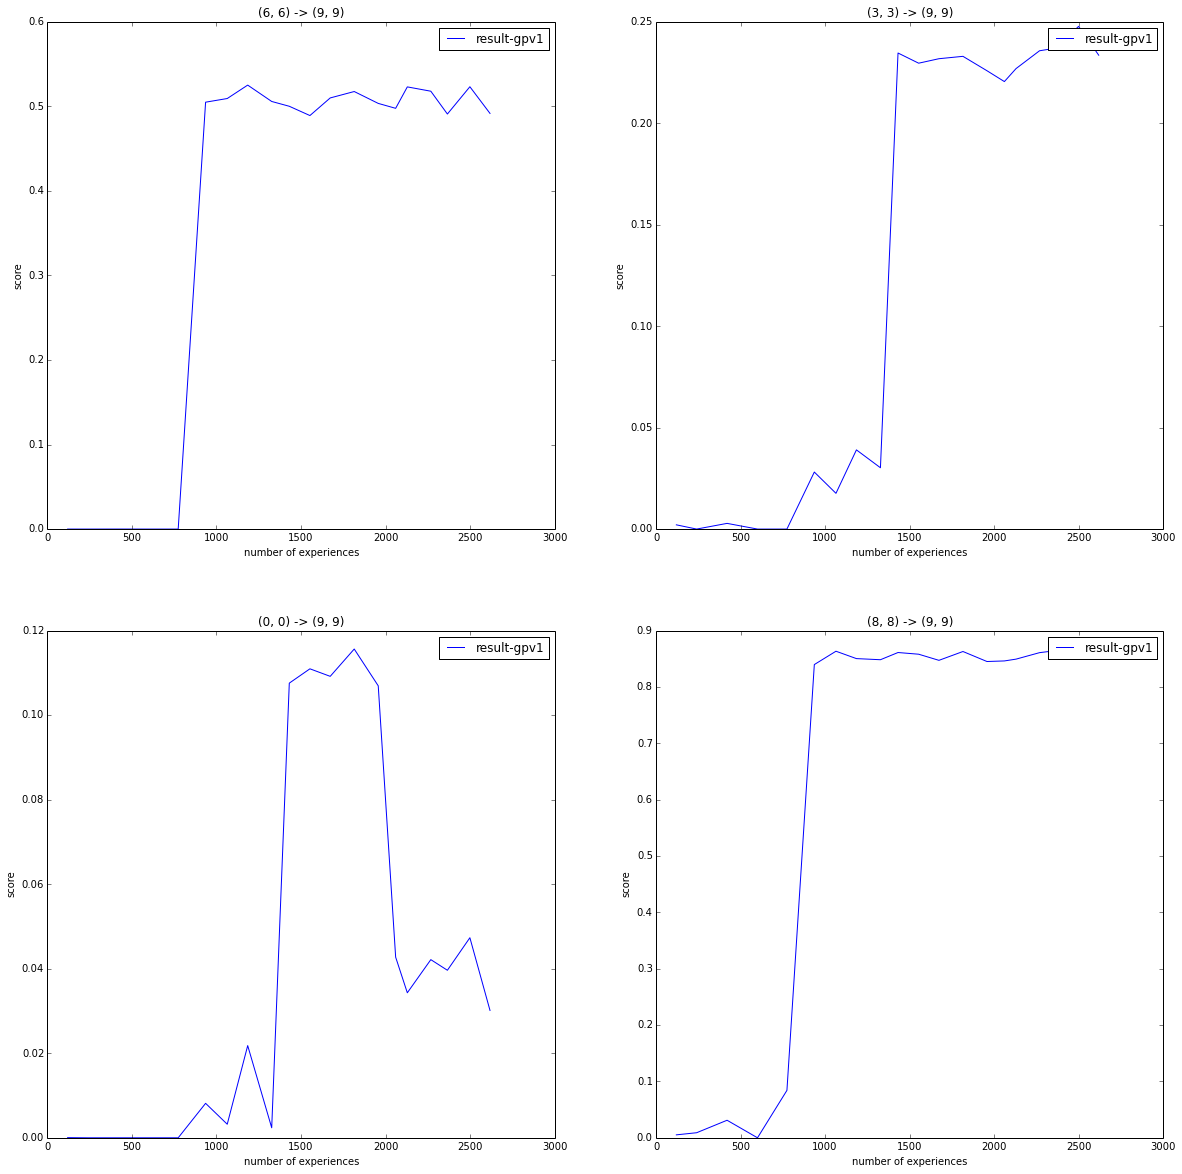

In [56]:
plot_mean_scores(['0x10b17f0d52dd41c592cdafd532c3d126'], ['result-gpv1'])